<a href="https://colab.research.google.com/github/Gowrid124/Gowrid124/blob/main/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the required libraries:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [8]:
import io
real = pd.read_csv(io.BytesIO(uploaded["True.csv"]))
fake = pd.read_csv(io.BytesIO(uploaded["Fake.csv"]))

Importing the dataset "fake and Real news Dataset". The dataset has been downloaded from the Kaggle.

In [9]:
real.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [10]:
fake.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

Combining the true and fake news dataset by creating a common variabl, 1 for True and 0 for Fake

In [11]:
real['target'] = 1
fake['target'] = 0

In [12]:
#combining using the target variable:
news_df = pd.concat([real,fake]).reset_index(drop=True)
news_df['original'] = news_df['title'] + ' ' +news_df['text']
news_df.head()

title  ...                                           original
0  As U.S. budget fight looms, Republicans flip t...  ...  As U.S. budget fight looms, Republicans flip t...
1  U.S. military to accept transgender recruits o...  ...  U.S. military to accept transgender recruits o...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  Senior U.S. Republican senator: 'Let Mr. Muell...
3  FBI Russia probe helped by Australian diplomat...  ...  FBI Russia probe helped by Australian diplomat...
4  Trump wants Postal Service to charge 'much mor...  ...  Trump wants Postal Service to charge 'much mor...

[5 rows x 6 columns]

In [16]:
# checking for any null values:
news_df.isnull().sum() #there are no null values

title       0
text        0
subject     0
date        0
target      0
original    0
dtype: int64

## Data cleaning

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = stopwords.words('english') #considering this stopword english
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [19]:
# replacing the unmatching words to same word
news_df.subject=news_df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})

## EDA

In [20]:
subset_news_df = news_df.groupby('target').apply(lambda x:x['title'].count()).reset_index(name='Counts')
subset_news_df.target.replace({0:'False',1:'True'},inplace=True)
plot = px.bar(subset_news_df, x='target',y='Counts',
             color='Counts', barmode='group',height=400)
plot.show()
            

In [21]:
subject_check=news_df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(subject_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

# predicting fake news with only the news headlines

In [22]:
news_df['clean_title'] = news_df['title'].apply(preprocess)
news_df['clean_title'][0]

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script']

In [23]:
news_df['clean_joined_title']=news_df['clean_title'].apply(lambda x:" ".join(x))
news_df.head()

title  ...                                 clean_joined_title
0  As U.S. budget fight looms, Republicans flip t...  ...  budget fight looms republicans flip fiscal script
1  U.S. military to accept transgender recruits o...  ...  military accept transgender recruits monday pe...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...          senior republican senator let mueller job
3  FBI Russia probe helped by Australian diplomat...  ...  fbi russia probe helped australian diplomat ti...
4  Trump wants Postal Service to charge 'much mor...  ...  trump wants postal service charge amazon shipm...

[5 rows x 8 columns]

## wordclouds for titles:

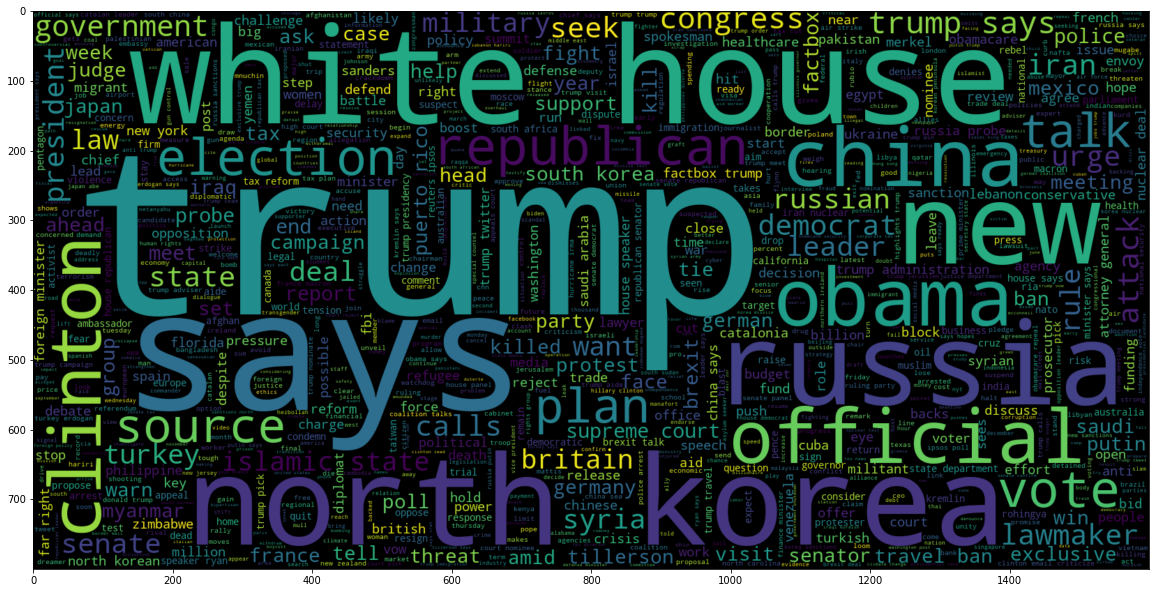

In [24]:
#Real news:
from nltk.corpus import stopwords
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news_df[news_df.target == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

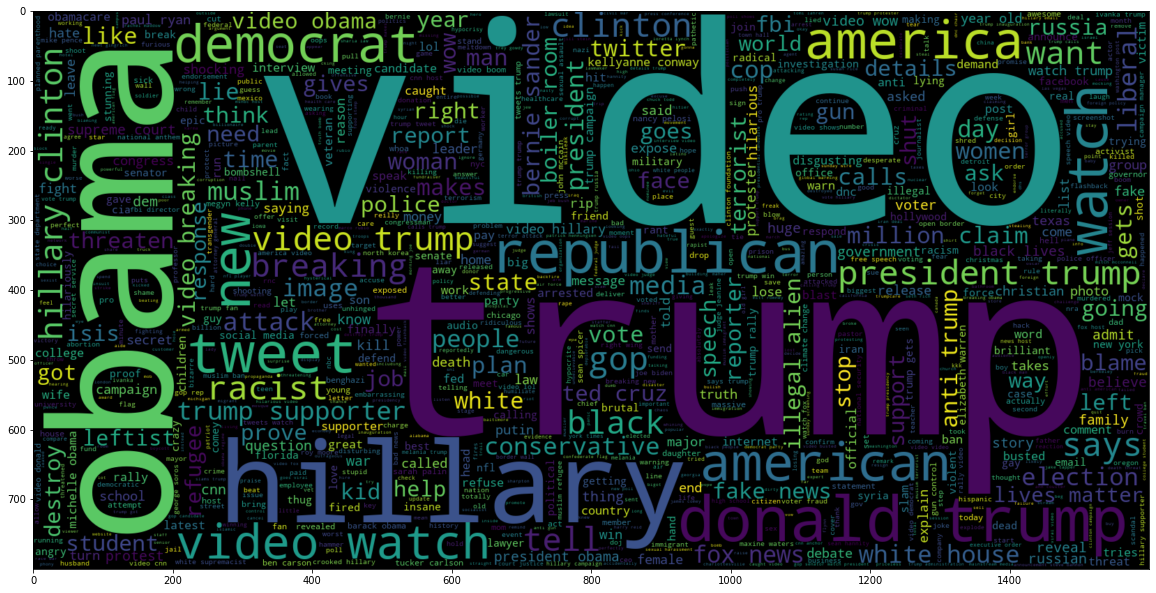

In [25]:
#Fake news:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news_df[news_df.target == 0].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

In [26]:
#wordcount in the news title:
maxlen = -1
for doc in news_df.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in news_df.clean_joined_title], nbins = 50)
fig.show()

The maximum number of words in a title is = 34


# Model building and prediction only with the news title:

In [27]:
# train and test split:
X_train, X_test, y_train, y_test = train_test_split(news_df.clean_joined_title, news_df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [28]:
model = LogisticRegression(C=2)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.947466974653341


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



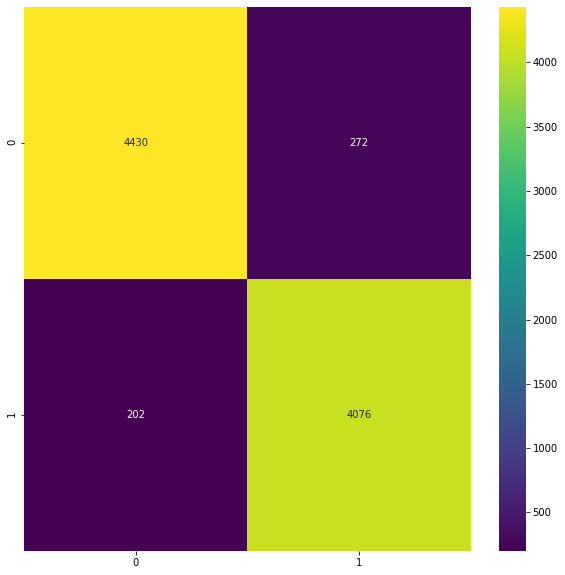

In [29]:
#confusion matrix:
cm = confusion_matrix(list(y_test), predicted_value)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

# Model building and predition with the news content:

In [31]:
#repeating the same methods for news content also:
news_df['clean_text'] = news_df['text'].apply(preprocess)
news_df['clean_joined_text']=news_df['clean_text'].apply(lambda x:" ".join(x))

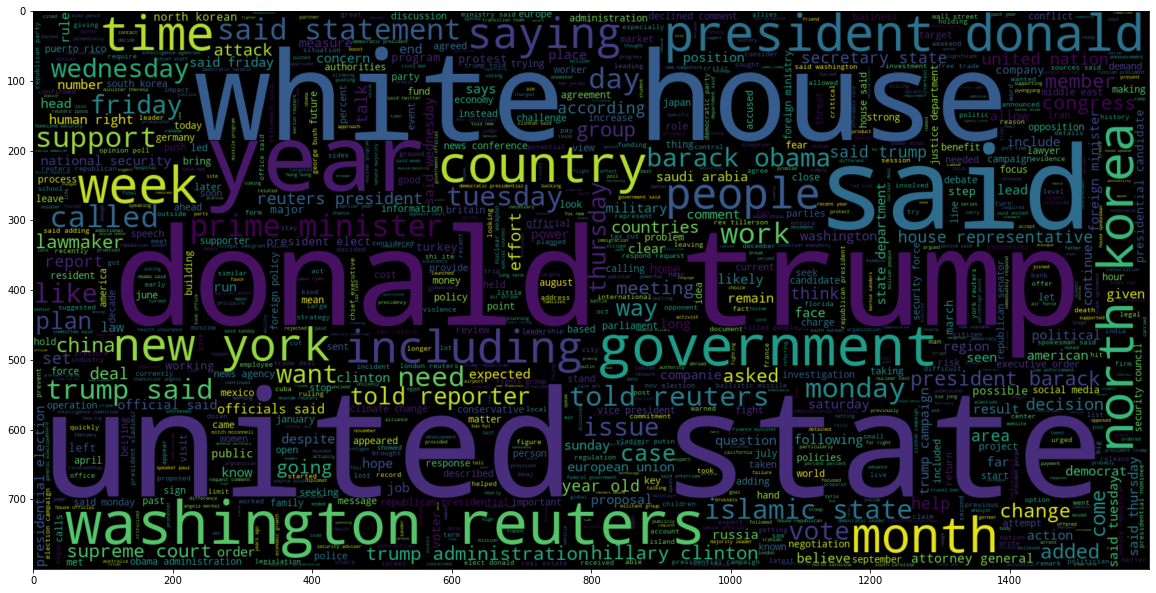

In [32]:
#wordcloud for real news content:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news_df[news_df.target == 1].clean_joined_text))
plt.imshow(wc, interpolation = 'bilinear')

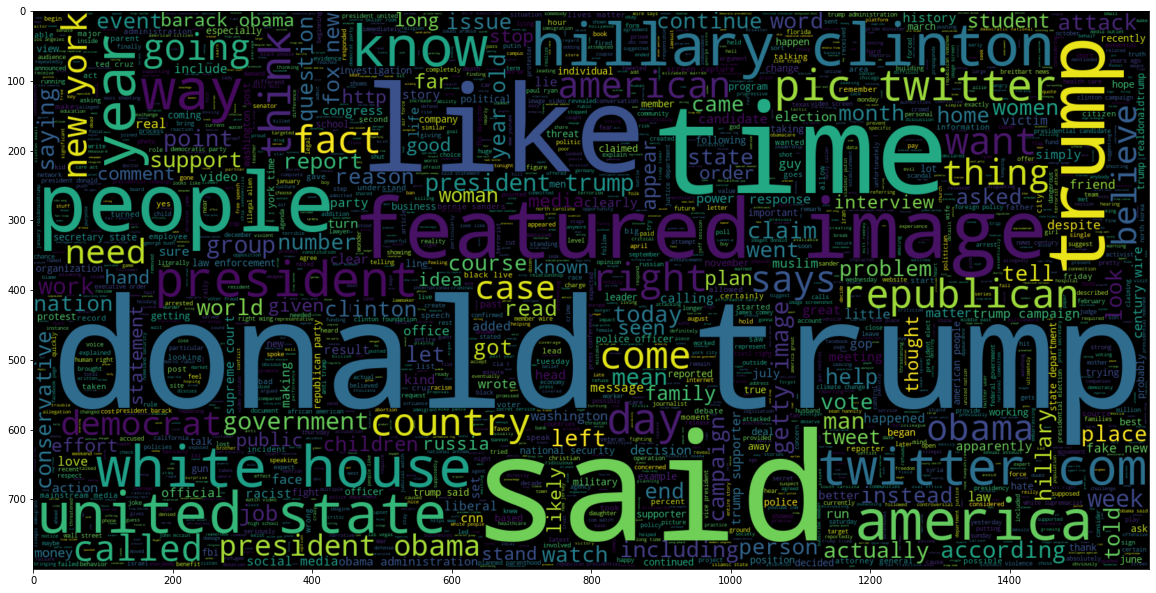

In [33]:
#wordcloud for fake news content:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news_df[news_df.target == 0].clean_joined_text))
plt.imshow(wc, interpolation = 'bilinear')

In [34]:
# calculating word distributions in the text news content:
maxlen = -1
for doc in news_df.clean_joined_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in news_df.clean_joined_text], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 4574


In [35]:
#model prediction:
X_train, X_test, y_train, y_test = train_test_split(news_df.clean_joined_text, news_df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9953661308915527


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



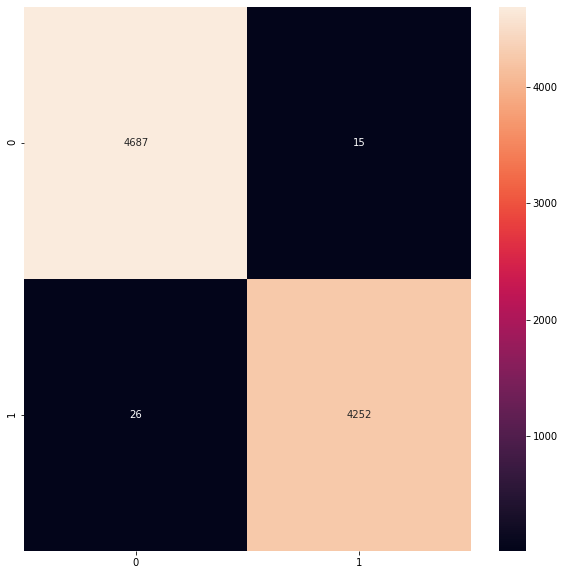

In [36]:
#confusion matrix:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')